# A2C

## Introduction: Actor-Critic

Synchronous advantage Actor Critic or better known as A2C is an algorithm based on the policy gradient model Actor-Critic, which combines value optimization and policy optimization.It operates with its two main components that are defined as neural networks, Actor and Critic, to solve RL-Problems. These neural networks run in parallel while also interacting with one another. Generally speaking, Actor-Critic combines *value based methods* with *policy based methods*<br>
To understand A2C we have to establish the basic principles of Actor-Critic first: <br>

__Actor__: It controls the agents behaviour, deciding which action to take based on the __policy__. <br>$$ \pi_{\theta}=(a|s)$$

__Critic__: measures the selected action of the actor by estimating the __value function__. It provides feedback for the actor on how to adjust the action.<br>$$Q_w=(a|s) $$

Furthermore, the actor updates the policy parameters into the direction suggested by the critic which may lead to a better decision. To prevent high variance and unstable learning the Actor-Critic method utilizes an approach to update policy parameters at each timestep, which is basically *Temporal-Difference Learning*. However, this approach would cancel out the maximum accumulated rewards because an update is done at every timestep. To replace the maximum reward ,calculated by the reward function, the critic has to approximate a value function that calculates the rewards at the end of the episode. To specify, we need to cross out the reward function from the policy gradient function and replace it with the value function.<br>

Consider the known policy gradient function as the update rule:<br> $$\Delta\theta=\alpha * \nabla_\theta(log\pi(s,a,\theta))*R(\tau) $$
The learning rate $\alpha$ is multiplied with the policy function and score function thus leading to an alteration in parameters described by $\Delta\theta$.<br>

For the critic we need to replace the reward function with the value function:<br>
$$\Delta\theta=\alpha * \nabla_\theta(log\pi(s,a,\theta))*Q(s,a) $$

As already stated above, the actor needs to update its policy parameters and this is also done with the altered update function with parametrized weights to the value function.

### Intuitive example
Let us imagine that you are playing a game, which means that you are the __actor__ since you control the actions and thus the outcome of the game. Your friend sits next to you, observing the actions you perform and telling you if the action you want to take is leading to a good state or a bad state, __criticizing__ on your performance so to speak. After you listened to your friend's feedback you adjust your playstyle and try to improve your performance in the next session while your friend also improves his understanding of the game to give you more valuable and precise feedback for the actions you will take. 
 
## Advantage Actor-Critic

Now that the basic principles are established we can move further to a general understanding of A2C. <br>
This algorithm uses an __advantage function__ which calculates the benefits on taking a specific action compared to the average action at the same state. $$ A(s,a)=Q(s,a)-V(s)$$

However, the problem to implement this function is that it uses two value functions which would lead to the construction of two neural networks and this in return would be inefficient. To avoid this, we can replace the action-value function with the __TD Error function__.$$ A(s,a)=r+\gamma V(s')-V(s)$$<br>

The main feature of both advantage Actor-critic methods (A2C and A3C) is the usage of multiple agents that run in parallel on multiple instances of the given environment. While each agent of A3C update the network asynchronously, the agents of A2C synchronize their updates meaning, even if an agent has finished its training it will wait for every other agent to finish. After that, the network is being updated by a coordinator and every agent starts with the same updated policy to renew that process. This will create a more consistent training process and furthermore, it is shown by [OpenAI](https://openai.com/blog/baselines-acktr-a2c/) that A2C is more efficient and performs better than its asychronous counterpart.<br>
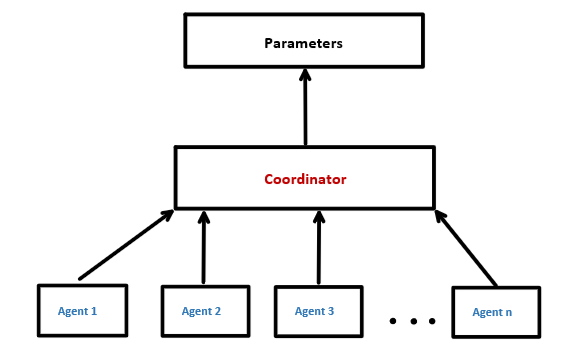<br>

To conclude, we can now adjust the policy gradient function with the advantage function which shows that the actor parameter and critic parameter will be updated on each timestep. $$\nabla_\theta J(\theta)  = \mathbb{E}_{\tau \sim \pi_{\theta}} [\sum^T_{t=0} \nabla_\theta \log \pi_\theta(a \vert s)A(s|a)]$$ 




## Example: LunarLander-v2

[LunarLander](https://gym.openai.com/envs/LunarLander-v2/) is a Box2D environment that consists of a rocket and a random generated floor with two flags that depicts the landing ground. The goal of the rocket is to land between these two flags to gain the maximum rewards. It can perform four actions: do nothing, start right engine, start left engine and start the main engine however, using the main engine would decrease the reward by -0.3 points for each frame. Moving to the landing zone and coming to rest will award 100 to 140 points. The episode terminates when the rocket crashes (-100 Points) or lands with the engines coming to rest (+100 points). Furthermore, the rocket has two legs and each leg that makes contact with the ground awards an additional reward of 10 points. The episode is considered solved when it reaches 200 reward points.
<br>

We have tested an A2C algorithm on the LunarLander environment for the total amount of timesteps of eleven million.<br>




The first evaluation was from the beginning to three million timesteps:<br>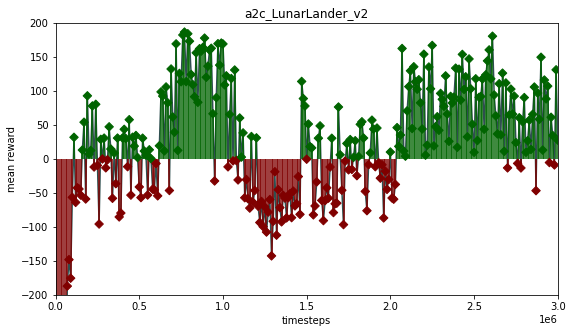<br>
We have evaluated the agents mean reward for every 10000 steps and as depicted above, the agent seems to be very inconsistent even after gathering a positive amount of mean rewards. One noteworthy thing here is, that the performance slowly degrades after hitting the peak in this model and even falls into the negative mean rewards for a time again around 1.2 million timesteps. This could be due to the fact, that the environment/floor constantly shifts combined with the agent not changing its behaviour. After two million timesteps it starts to score points again which means, the agent probably realised that the current solution strategy is not leading to the best rewards. At the end of the model there are still some outliers but other than that it seems that the agent has found a consistent solution strategy.<br>


Next we have let the agent train from three million timesteps, from where it ended in the model above so to speak, to eleven million timesteps:<br>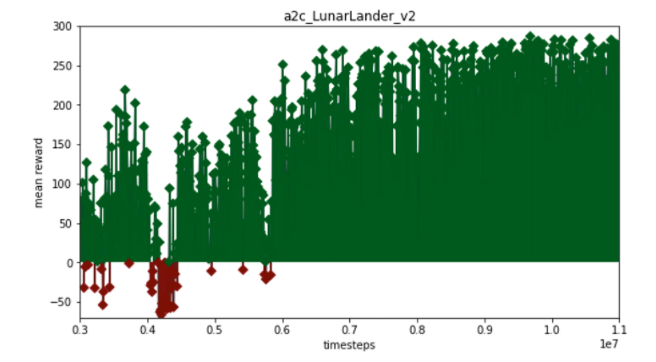<br>
Even with a few evaluations that show a small negative phase one can say that the agent has found its best solution strategy and improves with every episode and reaching a peak before hitting the ten million timestep mark. The mean reward range after eight million timesteps is about 250 to 300 points, which just shows that the agent has reached a level of high consistency.
Of course, the agent could be trained for even more than eleven million timesteps but in this case we can say that the agent is perfectly trained and has a good foundation of knowledge about the environment and its impact on it.

## Conclusion 
In this post we have discussed the basic principles of Actor-Critic methods and given an intuitive example on how this method should work. Then we moved to the more advanced concept of advantage actor critic which compares the benefits of the specific action to the average action that could be taken in the state. We have stated, that A2C is generally a better algorithm to solve RL-Problems compared to its counterpart A3C since A2C is more efficient and has a better way of updating the global parameters. <br>
Another noteworthy algorithm in the Actor-Critic family is [ACKTR](https://openai.com/blog/baselines-acktr-a2c/) ("Actor") which even outperforms A2C and is in general more efficient in terms of sample complexity. However, for the basic idea of advantage actor critic it is beneficial to start with the methods of A2C or A3C first.

## References
[OpenAI Baselines:ACKTR & A2C](https://openai.com/blog/baselines-acktr-a2c/)

[Lilian Weng:Policy Gradient Algorithms](https://lilianweng.github.io/posts/2018-04-08-policy-gradient/)

[freeCodeCamp:An intro to Advantage Actor Critic methods:](https://www.freecodecamp.org/news/an-intro-to-advantage-actor-critic-methods-lets-play-sonic-the-hedgehog-86d6240171d/)

[OpenAi:LunarLander-v2](https://gym.openai.com/envs/LunarLander-v2/)

[Chris Yoon:Understanding Actor Critic Methods and A2C](https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f)

[Mnih _et al._:Asynchronous Methods for Deep Reinforcement Learning](https://arxiv.org/abs/1602.01783)